# pycisTopic analysis

Full dataset, using consensus peak regions.

In [1]:
import pycisTopic
pycisTopic.__version__

'0.1.dev300+g7494158'

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import pickle
import pandas as pd

In [4]:
import os
wdir = '/lustre1/project/stg_00002/lcb/fderop/data/20211024_hca_benchmark_libds_merged/'
os.chdir( wdir )

In [5]:
# create output directory:
f_final_dir = os.path.join(wdir, 'downstream_analysis')
if not os.path.exists(f_final_dir):
    os.makedirs(f_final_dir)

In [6]:
import re

sample_annot = pd.DataFrame(
    [
        ['Broad_1','BioRad'],
        ['Broad_2','BioRad'],
        ['Stanford_1','10x v1.0'],
        ['Stanford_2','10x v1.0'],
        ['VIB_1','10x v1.0'],
        ['VIB_2','10x v1.0'],
        ['CNAG_1','10x v1.1'],
        ['CNAG_2','10x v1.1'],
        ['Broad_mito_1','mito-scATAC-seq'],
        ['Broad_mito_2','mito-scATAC-seq'],
        ['Sanger_1','10x multiome'],
        ['Sanger_2','10x multiome'],
        ['s3atac','s3-ATAC'],
        ['VIB_Hydrop_1','HyDrop'],
        ['VIB_Hydrop_2','HyDrop'],
        
    ],
    columns=['key','Technology']
)
sample_annot['Sample'] = sample_annot['key']
sample_annot.set_index('key', drop=False, inplace=True)
# rename samples:
sample_annot.loc['Broad_1','Sample'] = 'Harvard_1'
sample_annot.loc['Broad_2','Sample'] = 'Harvard_2'
sample_annot.loc['Broad_mito_1','Sample'] = 'Broad_1'
sample_annot.loc['Broad_mito_2','Sample'] = 'Broad_2'
sample_annot.loc['s3atac','Sample'] = 'OHSU'
sample_annot.loc['VIB_Hydrop_1','Sample'] = 'VIB_Hydrop_1'
sample_annot.loc['VIB_Hydrop_2','Sample'] = 'VIB_Hydrop_2'

sample_annot['Replicate'] = [ x.Sample.split('_')[-1] for i,x in sample_annot.iterrows() ]
sample_annot['st'] = [ re.sub('_[0-9]','',x.Sample)+' ('+x.Technology+')' for i,x in sample_annot.iterrows() ]
sample_annot['st'] = [ re.sub('_',' ',x) for x in sample_annot['st'] ]

sample_annot.loc[sample_annot['key']=='s3atac','Replicate'] = 1
sample_map = { x: y.Sample for x,y in sample_annot.iterrows() }
sample_annot

,key,Technology,Sample,Replicate,st
key,,,,,
Broad_1,Broad_1,BioRad,Harvard_1,1,Harvard (BioRad)
Broad_2,Broad_2,BioRad,Harvard_2,2,Harvard (BioRad)
Stanford_1,Stanford_1,10x v1.0,Stanford_1,1,Stanford (10x v1.0)
Stanford_2,Stanford_2,10x v1.0,Stanford_2,2,Stanford (10x v1.0)
VIB_1,VIB_1,10x v1.0,VIB_1,1,VIB (10x v1.0)
VIB_2,VIB_2,10x v1.0,VIB_2,2,VIB (10x v1.0)
CNAG_1,CNAG_1,10x v1.1,CNAG_1,1,CNAG (10x v1.1)
CNAG_2,CNAG_2,10x v1.1,CNAG_2,2,CNAG (10x v1.1)
Broad_mito_1,Broad_mito_1,mito-scATAC-seq,Broad_1,1,Broad (mito-scATAC-seq)


## Load the cisTopic objects

In [7]:
f_cto_dir = 'pycistopic_consensus_peaks/cistopic_objs__mergedconsensus/'

cistopic_obj_dict = {}
for key in ['libds_merged']:
    f_cto = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj_mergedconsensus_metadata_annotated_models.pkl')
    if(os.path.isfile(f_cto)):
        with open(f_cto, 'rb') as f:
            cistopic_obj_dict[key] = pickle.load(f)
        print(f"Loaded filtered cistopic object {key}")
    else:
        print(f"file {f_cto} doesn't exist")

Loaded filtered cistopic object libds_merged


In [8]:
cistopic_obj_dict['libds_merged'].cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,...,FRIP,TSS_enrichment,barcode,seurat_cell_type,consensus_cell_type,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_0.8,pycisTopic_leiden_10_1.0,pycisTopic_leiden_10_1.2,fmx_sample
CCTCCTTCTTCATCCAGAGAG_TAAGAGGGTGGCGCCTTGCGA_CGGTACGTGTCGCTATGAATA-Broad_1,5923,3.772542,5236,3.719,Broad_1,4.350713,3.887955,22424,7726,14698,...,0.735698,34.677065,CCTCCTTCTTCATCCAGAGAG_TAAGAGGGTGGCGCCTTGCGA_CG...,Natural killer cell,Natural killer cell,22,24,23,21,sampleA
CCTTAGGACGAGAATTATCAT_CCGCGATACCTACCAGATAGG-Broad_1,7849,3.894814,6666,3.823865,Broad_1,4.482273,4.001820,30358,10042,20316,...,0.748456,27.324238,CCTTAGGACGAGAATTATCAT_CCGCGATACCTACCAGATAGG,B cell,B cell,20,22,20,16,sampleA
ATGAATAGTGCATTGCAGTGT-Broad_1,7326,3.864867,6303,3.799547,Broad_1,4.440736,3.978728,27589,9522,18067,...,0.733144,28.436431,ATGAATAGTGCATTGCAGTGT,CD4+ T cell,CD4+ T cell,1,0,0,0,sampleA
TGTTTAGATAGGCATAAGGTA-Broad_1,3605,3.556905,3301,3.518646,Broad_1,4.080193,3.675503,12028,4737,7291,...,0.741186,33.100024,TGTTTAGATAGGCATAAGGTA,Natural killer cell,Cytotoxic T cell,22,24,23,21,sampleA
TTACAGAGGTGTTTCCAAGCT_GGACGACAGTTTCTCTAGAGC-Broad_1,8829,3.945912,7608,3.881271,Broad_1,4.475453,4.043677,29885,11058,18827,...,0.751583,23.437703,TTACAGAGGTGTTTCCAAGCT_GGACGACAGTTTCTCTAGAGC,Natural killer cell,Natural killer cell,22,24,23,21,sampleA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGTTAGTTGGTATTGCAGCTCGGACAAC-s3atac,127,2.103804,127,2.103804,s3atac,3.208710,3.184975,1617,1531,86,...,0.080340,6.560000,GGTTAGTTGGTATTGCAGCTCGGACAAC,B cell,CD14+ monocyte,25,29,29,31,sampleA
GATTCGGTCAGTTCTCTCCTTGACGAAT-s3atac,203,2.307496,199,2.298853,s3atac,3.311118,3.289812,2047,1949,98,...,0.100051,6.280000,GATTCGGTCAGTTCTCTCCTTGACGAAT,B cell,CD4+ T cell,25,29,29,31,sampleB
TGCGGCCTGGTCTCATTGCCCGGAACTG-s3atac,252,2.401401,250,2.39794,s3atac,3.386856,3.362671,2437,2305,132,...,0.107158,8.170000,TGCGGCCTGGTCTCATTGCCCGGAACTG,CD4+ T cell,CD4+ T cell,8,9,8,8,sampleB
GAAGAGTATTTCTCCTCCTGGTGTCGGA-s3atac,169,2.227887,166,2.220108,s3atac,3.288696,3.262451,1944,1830,114,...,0.087432,4.430000,GAAGAGTATTTCTCCTCCTGGTGTCGGA,B cell,CD4+ T cell,25,29,29,31,sampleB


### Binarize the topic-region distributions

In [8]:
from pycisTopic.topic_binarization import binarize_topics

libds_merged


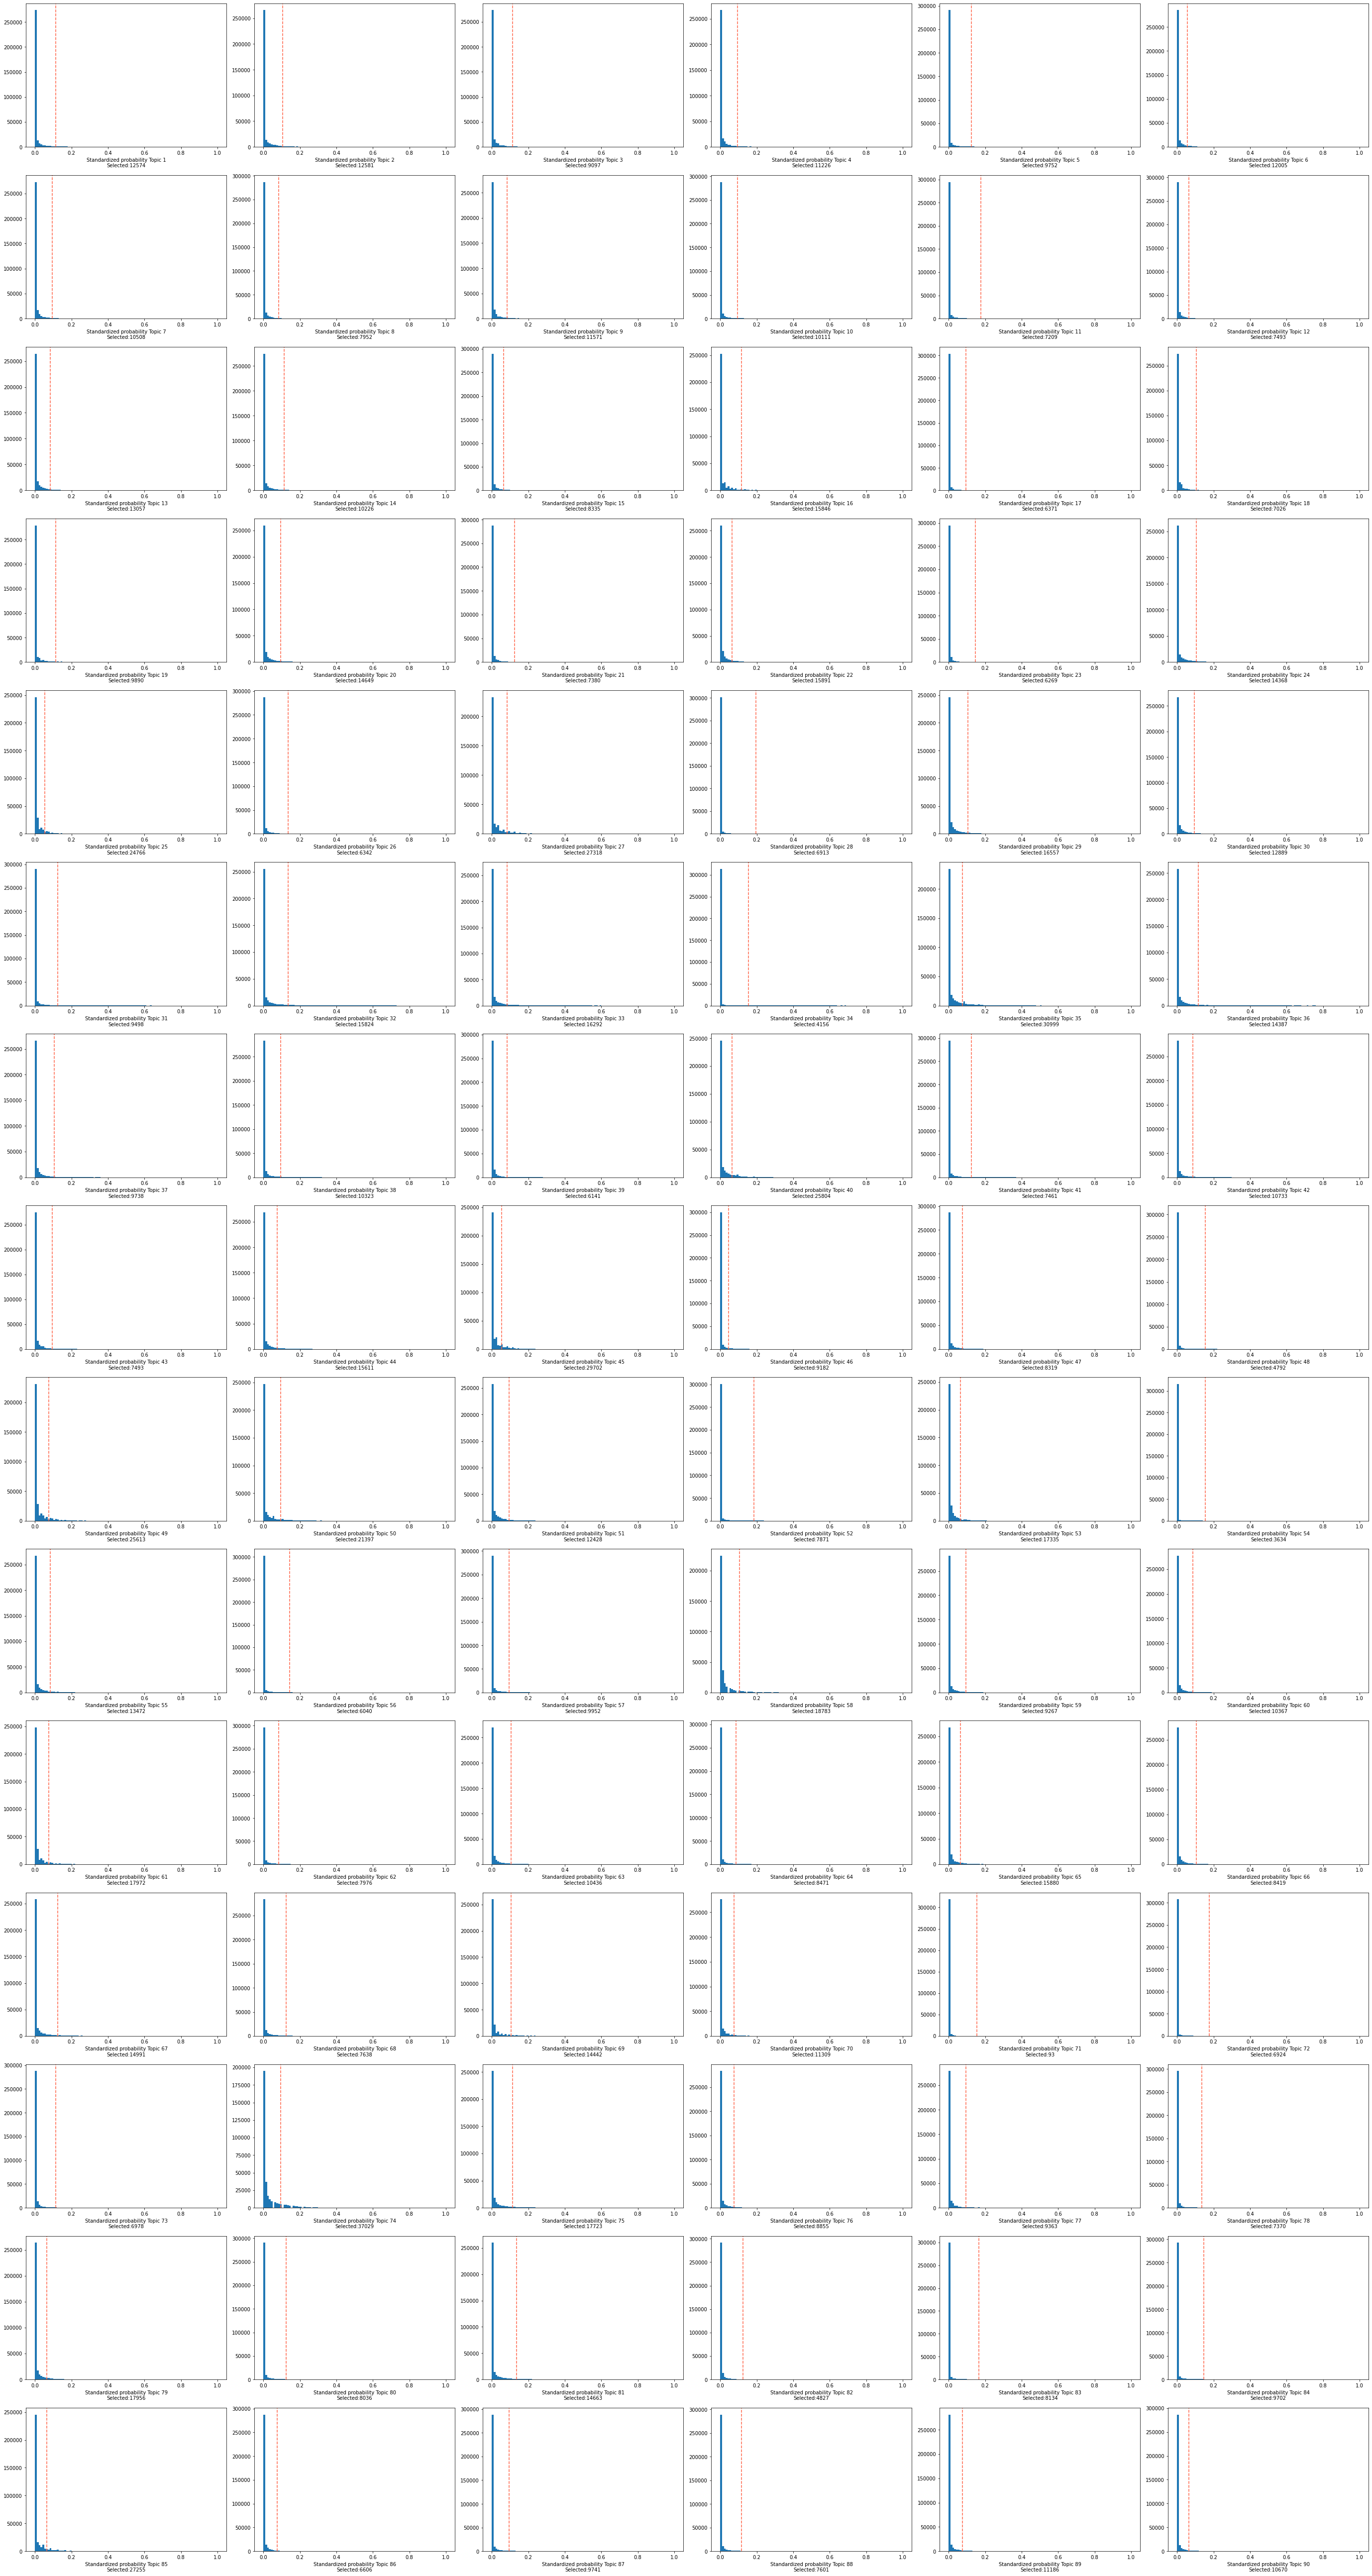

In [9]:
region_bin_topics_dict = {}
for key in cistopic_obj_dict.keys():
    print(key)
    region_bin_topics_dict[key] = binarize_topics(
        cistopic_obj_dict[key],
        method='otsu',
        ntop=3000,
        plot=True,
        num_columns=6,
    )

### Binarize the cell-topic distribions

libds_merged


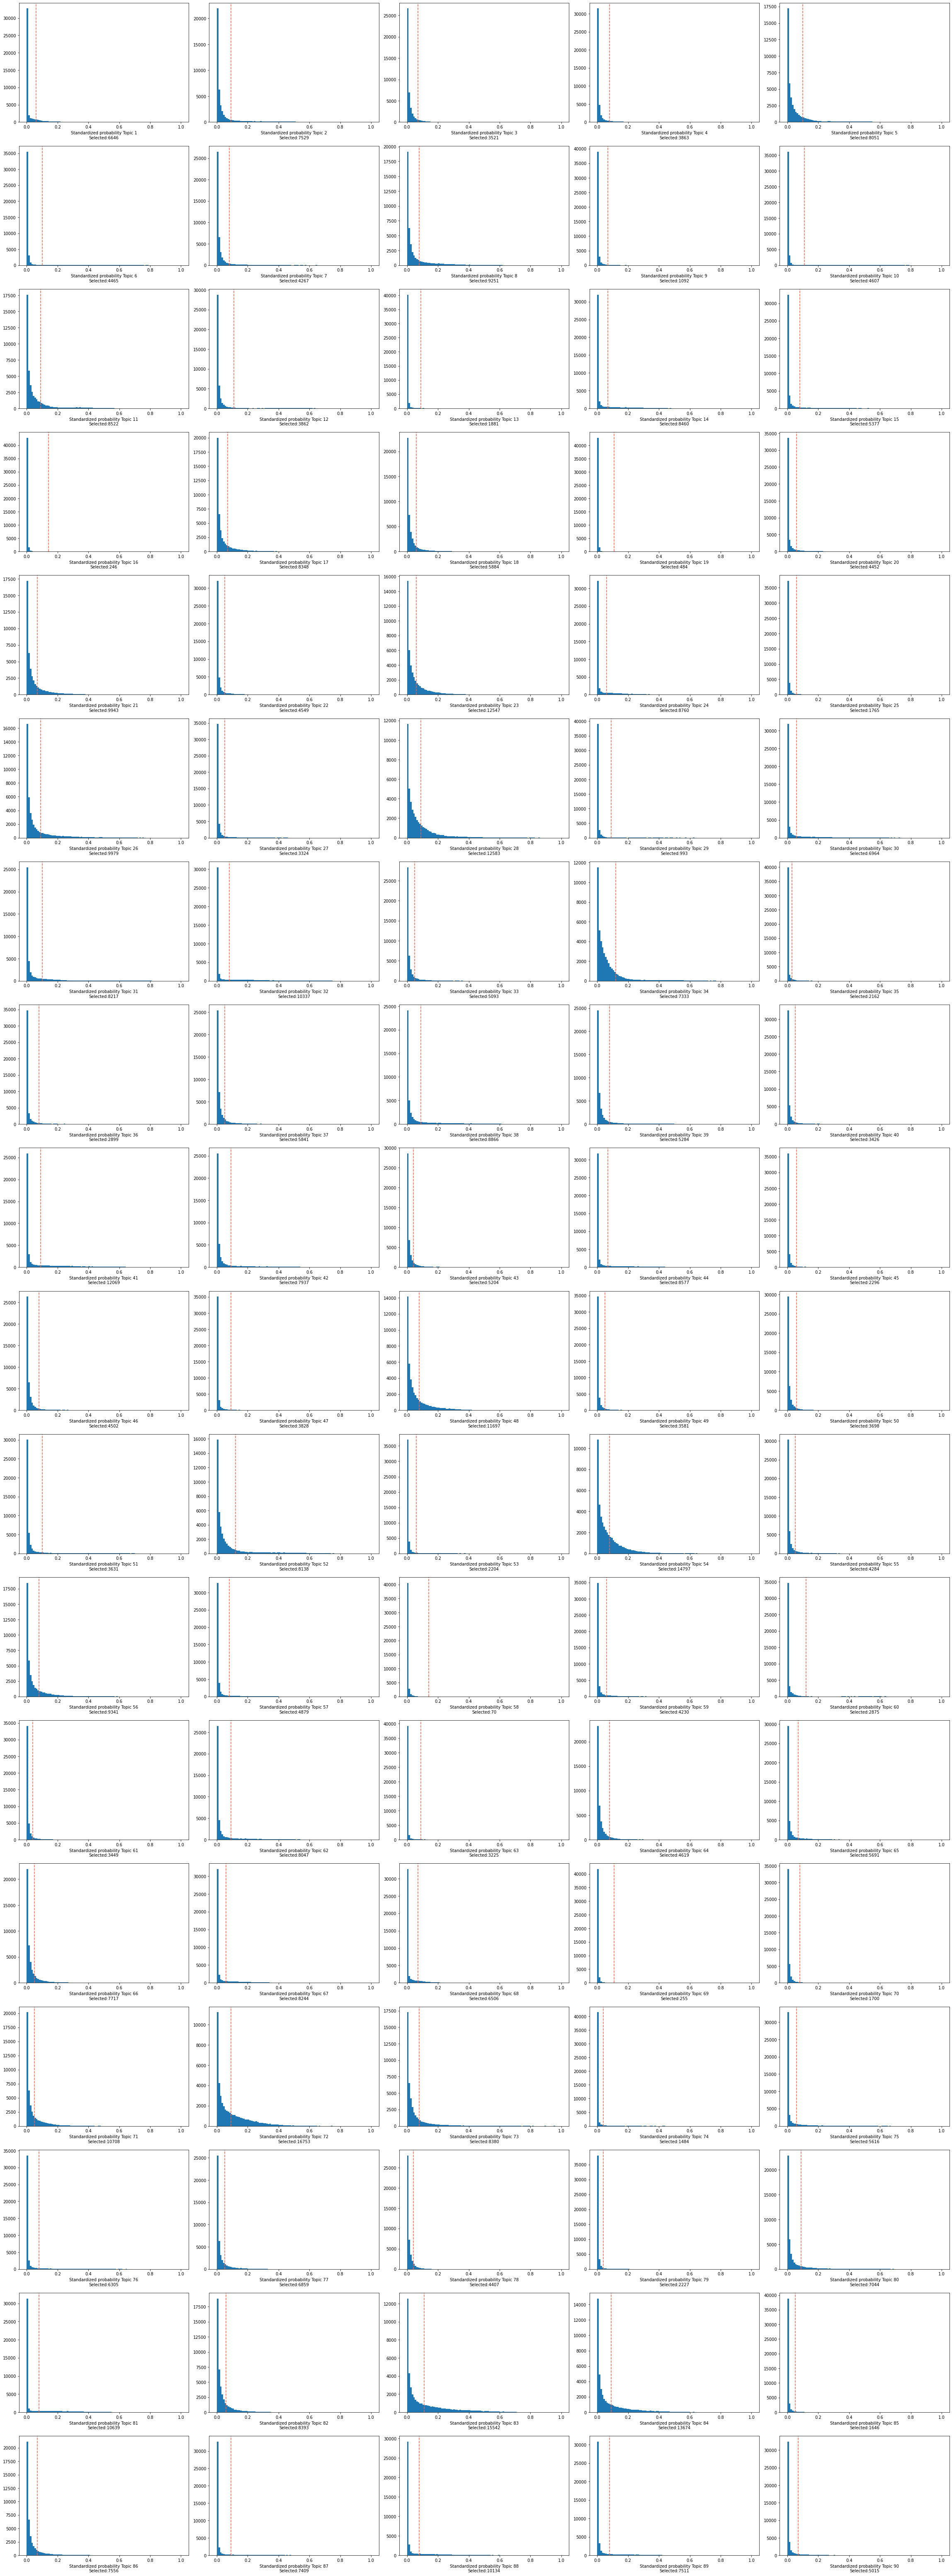

In [10]:
binarized_cell_topic_dict = {}
for key in cistopic_obj_dict.keys():
    print(key)
    binarized_cell_topic = binarize_topics(
        cistopic_obj_dict[key],
        target='cell',
        method='li',
        plot=True,
        num_columns=5,
        nbins=100
    )
    binarized_cell_topic_dict[key] = binarized_cell_topic.copy()

### Compute the topic quality control metrics

In [11]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc
from pycisTopic.utils import fig2img
import matplotlib.pyplot as plt

libds_merged


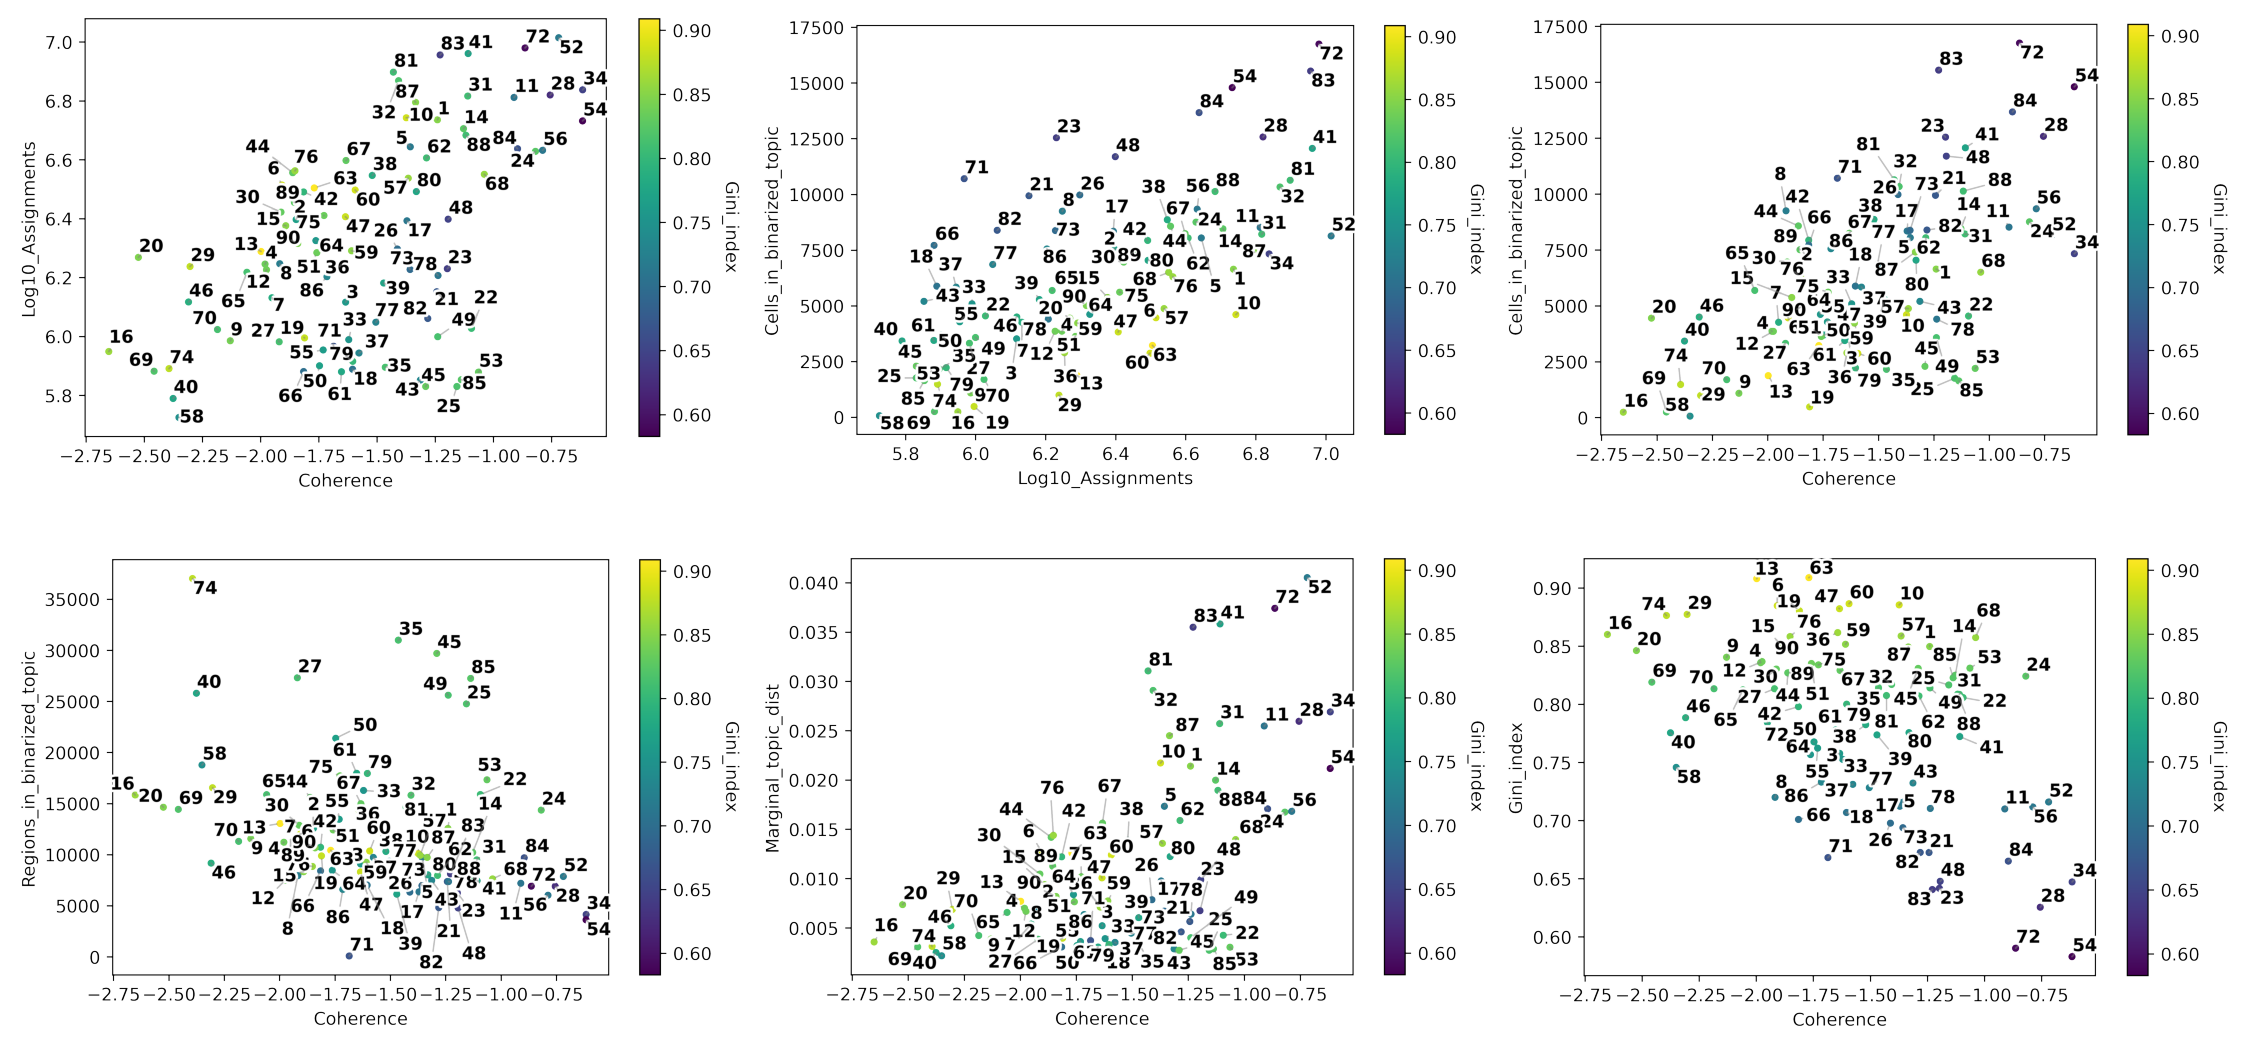

In [12]:
topic_qc_metrics_dict = {}
for key in cistopic_obj_dict.keys():
    print(key)
    topic_qc_metrics = compute_topic_metrics(
        cistopic_obj_dict[key]
    )

    fig_dict={}
    fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
    fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
    fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
    fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
    fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
    fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

    fig=plt.figure(figsize=(40, 43))
    i = 1
    for fig_ in fig_dict.keys():
        plt.subplot(2, 3, i)
        img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
        plt.imshow(img)
        plt.axis('off')
        i += 1
    plt.subplots_adjust(wspace=0, hspace=-0.70)
    #plt.tight_layout()
    plt.show()
    
    topic_qc_metrics_dict[key] = topic_qc_metrics.copy()

### Annotate topics

In [13]:
from pycisTopic.topic_qc import topic_annotation

In [14]:
for key in cistopic_obj_dict.keys():
    print(key)
    topic_annot = topic_annotation(
        cistopic_obj_dict[key],
        annot_var='consensus_cell_type',
        binarized_cell_topic=binarized_cell_topic_dict[key],
        general_topic_thr = 0.2
    )
    topic_qc_metrics_dict[key] = pd.concat(
        [ 
            topic_annot[['consensus_cell_type', 'Ratio_cells_in_topic', 'Ratio_group_in_population']],
            topic_qc_metrics_dict[key]
        ],
        axis=1
    )

libds_merged


# imputed acc

## Differentially Accessible Regions (DARs)

In [15]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
from pycisTopic.clust_vis import plot_imputed_features
import numpy as np
import copy

libds_merged
2021-10-28 11:32:23,104 cisTopic     INFO     Imputing drop-outs
2021-10-28 11:32:32,095 cisTopic     INFO     Removing small values
2021-10-28 11:33:56,799 cisTopic     INFO     Converting to sparse matrix
2021-10-28 11:40:54,007 cisTopic     INFO     Scaling
2021-10-28 11:41:09,001 cisTopic     INFO     Keep non zero rows
2021-10-28 11:41:57,334 cisTopic     INFO     Create CistopicImputedFeatures object
2021-10-28 11:41:57,335 cisTopic     INFO     Done!
2021-10-28 11:41:57,337 cisTopic     INFO     Normalizing imputed data
2021-10-28 11:50:58,046 cisTopic     INFO     Done!
2021-10-28 11:50:58,051 cisTopic     INFO     Calculating mean and variance


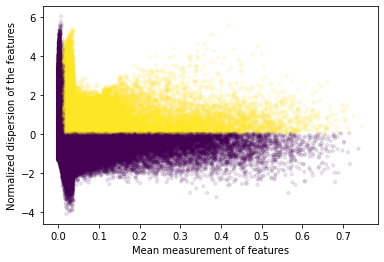

2021-10-28 12:04:46,559 cisTopic     INFO     Done!
Found 57589 variable regions


2021-10-28 12:05:45,541	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8266


(pid=18006) 2021-10-28 12:05:54,920 cisTopic     INFO     Computing p-value for B cell
(pid=18001) 2021-10-28 12:05:57,173 cisTopic     INFO     Computing p-value for CD14+ monocyte
(pid=18009) 2021-10-28 12:05:59,698 cisTopic     INFO     Computing p-value for CD16+ monocyte
(pid=18002) 2021-10-28 12:06:01,841 cisTopic     INFO     Computing p-value for CD4+ T cell
(pid=18000) 2021-10-28 12:06:04,516 cisTopic     INFO     Computing p-value for Cytotoxic T cell
(pid=18003) 2021-10-28 12:06:07,070 cisTopic     INFO     Computing p-value for Dendritic cell
(pid=18007) 2021-10-28 12:06:10,025 cisTopic     INFO     Computing p-value for Natural killer cell
(pid=18006) 2021-10-28 12:19:01,245 cisTopic     INFO     Computing log2FC for B cell
(pid=18001) 2021-10-28 12:19:05,012 cisTopic     INFO     Computing log2FC for CD14+ monocyte
(pid=18003) 2021-10-28 12:19:05,807 cisTopic     INFO     Computing log2FC for Dendritic cell
(pid=18009) 2021-10-28 12:19:11,730 cisTopic     INFO     Computi

In [16]:
imputed_acc_obj_dict = {}
markers_dict_dict = {}

for key in cistopic_obj_dict.keys():
    print(key)
    imputed_acc_obj = impute_accessibility(
        cistopic_obj_dict[key],
        selected_cells=None,
        selected_regions=None,
        scale_factor=10**6
    )
    normalized_imputed_acc_obj = normalize_scores(
        imputed_acc_obj,
        scale_factor=10**4
    )
    variable_regions = find_highly_variable_features(
        normalized_imputed_acc_obj,
        min_disp = 0.05,
        min_mean = 0.0125, 
        max_mean = 3,
        max_disp = np.inf,
        n_bins=20, 
        n_top_features=None,
        plot=True,
    )
    print(f"Found {len(variable_regions)} variable regions")
    markers_dict= find_diff_features(
        cistopic_obj_dict[key],
        imputed_acc_obj,
        variable='consensus_cell_type',
        var_features=variable_regions,
        contrasts=None,
        adjpval_thr=0.05,
        log2fc_thr=np.log2(1.5),
        n_cpu=12,
    )
    imputed_acc_obj_dict[key] = copy.copy(imputed_acc_obj)
    markers_dict_dict[key] = markers_dict.copy()

## Differentially Accessible Regions (DARs) between techniques, for b-cells

In [ ]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
from pycisTopic.clust_vis import plot_imputed_features
import numpy as np
import copy

In [ ]:
imputed_acc_obj_dict = {}
markers_dict_dict = {}

for key in cistopic_obj_dict.keys():
    print(key)
    imputed_acc_obj = impute_accessibility(
        cistopic_obj_dict[key],
        selected_cells=None,
        selected_regions=None,
        scale_factor=10**6
    )
    normalized_imputed_acc_obj = normalize_scores(
        imputed_acc_obj,
        scale_factor=10**4
    )
    variable_regions = find_highly_variable_features(
        normalized_imputed_acc_obj,
        min_disp = 0.05,
        min_mean = 0.0125, 
        max_mean = 3,
        max_disp = np.inf,
        n_bins=20, 
        n_top_features=None,
        plot=True,
    )
    print(f"Found {len(variable_regions)} variable regions")
    markers_dict= find_diff_features(
        cistopic_obj_dict[key],
        imputed_acc_obj,
        variable='consensus_cell_type',
        var_features=variable_regions,
        contrasts=None,
        adjpval_thr=0.05,
        log2fc_thr=np.log2(1.5),
        n_cpu=12,
    )
    imputed_acc_obj_dict[key] = copy.copy(imputed_acc_obj)
    markers_dict_dict[key] = markers_dict.copy()

# fderop: write dars to bed 

In [17]:
for x in markers_dict_dict['libds_merged'].keys():
    markers = markers_dict_dict['libds_merged'][x].index.tolist()
    df = pd.DataFrame(markers)
    df[[0,1]] = df[0].str.split(':',expand=True)
    df[[1,2]] = df[1].str.split('-',expand=True)
    df[3] = markers_dict_dict['libds_merged'][x].index.tolist()
    df[3] = x + '_' + df[3].astype(str)
    score = markers_dict_dict['libds_merged'][x]['Log2FC']
    score = score.reset_index(drop=True)
    df[4] = score
    # name = x.replace(' ', '_')
    name = x
    print(name)

B cell
CD14+ monocyte
CD16+ monocyte
CD4+ T cell
Cytotoxic T cell
Dendritic cell
Natural killer cell


In [18]:
for key in markers_dict_dict.keys():
    for x in markers_dict_dict[key].keys():
        markers = markers_dict_dict[key][x].index.tolist()
        df = pd.DataFrame(markers)
        df[[0,1]] = df[0].str.split(':',expand=True)
        df[[1,2]] = df[1].str.split('-',expand=True)
        df[3] = markers_dict_dict[key][x].index.tolist()
        df[3] = x.replace(' ', '_')# + '_' + df[3].astype(str)
        score = markers_dict_dict[key][x]['Log2FC']
        score = score.reset_index(drop=True)
        df[4] = score
        df[5] = '.'
        pval = markers_dict_dict[key][x]['Adjusted_pval']
        pval = pval.reset_index(drop=True)
        df[6] = pval
        name = x.replace(' ', '_')
        # name = name.replace('/', '-')
        df.to_csv('downstream_analysis/DARs/libds__'+key + '__'+name.replace(' ', '_')+'__DARs.bed', sep='\t', header=False, index=False)
        df[0:2000].to_csv('downstream_analysis/DARs/libds__'+key + '__'+name.replace(' ', '_')+'__DARs.TOP2K.bed', sep='\t', header=False, index=False)

# visualise dars

libds_merged
B cell: 9955
CD14+ monocyte: 30421
CD16+ monocyte: 28198
CD4+ T cell: 12855
Cytotoxic T cell: 10142
Dendritic cell: 19190
Natural killer cell: 9482


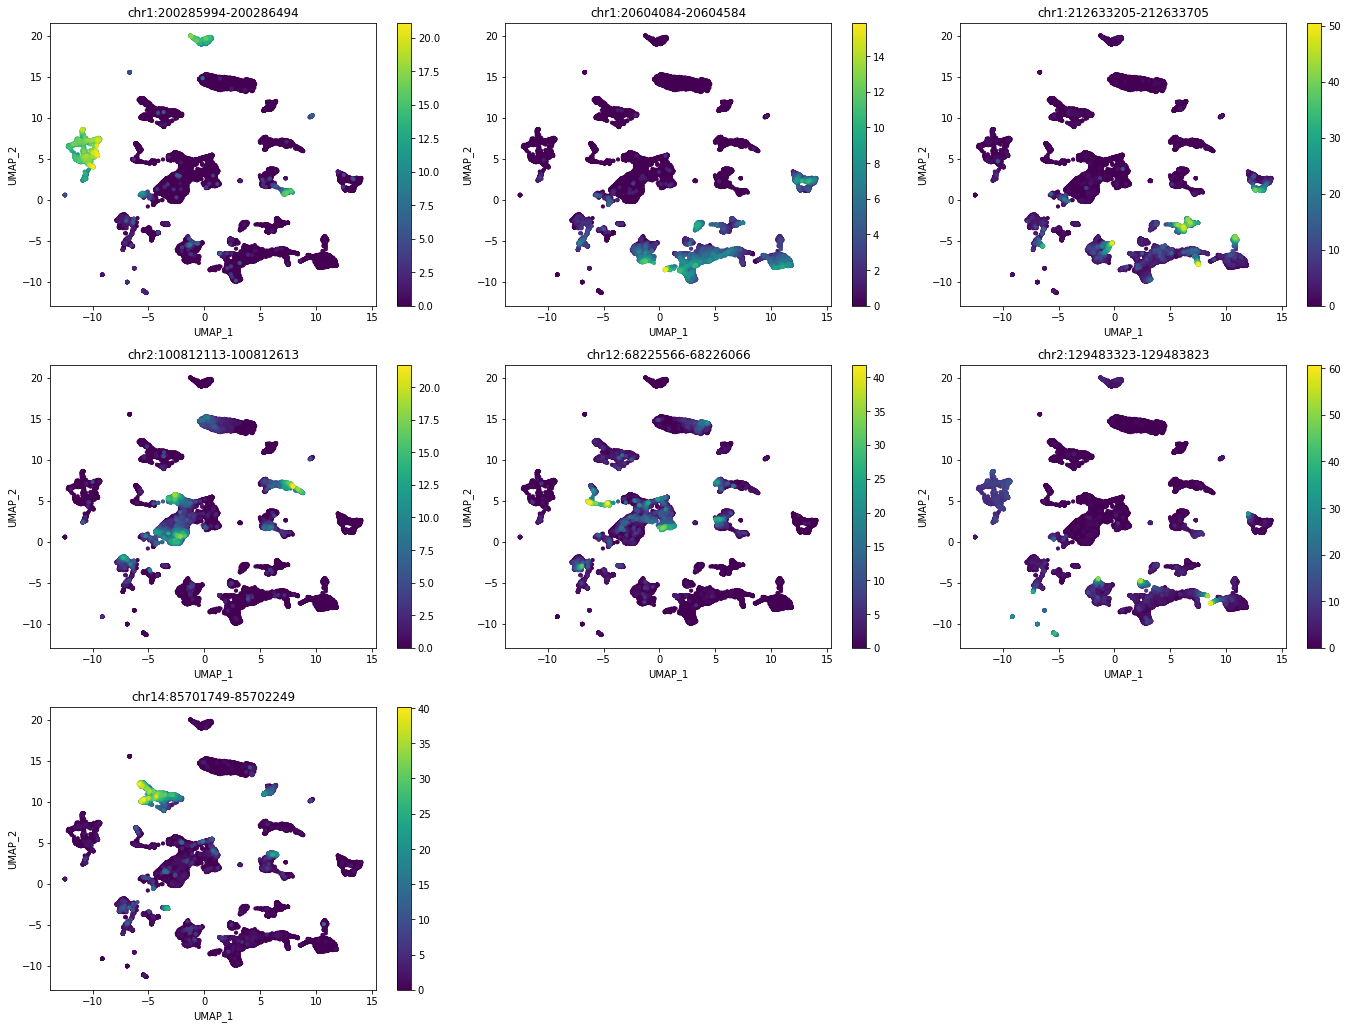

In [19]:
for key in cistopic_obj_dict.keys():
    print(key)
    [ print(x + ': '+ str(len(markers_dict_dict[key][x]))) for x in markers_dict_dict[key].keys() ]
    plot_imputed_features(
        cistopic_obj_dict[key],
        reduction_name='UMAP',
        imputed_data=imputed_acc_obj_dict[key],
        features=[markers_dict_dict[key][x].index.tolist()[0] for x in markers_dict_dict[key].keys()],
        #['B cell', 'CD14+ monocyte', 'CD4+ T cell', 'Cytotoxic T cell', 'Natural killer cell']
        scale=False,
        num_columns=3,
        selected_cells = cistopic_obj_dict[key].projections['cell']['UMAP'].index.tolist(),
    )

#### Save/load

In [9]:
f_out = os.path.join(f_final_dir, 'region_bin_topics.pkl')
if os.path.isfile(f_out):
    print(f"Loading {f_out}")
    with open(f_out, 'rb') as f:
        region_bin_topics_dict = pickle.load(f)
else:
    with open(f_out, 'wb') as f:
        pickle.dump(region_bin_topics_dict, f)

Loading /lustre1/project/stg_00002/lcb/fderop/data/20211024_hca_benchmark_libds_merged/downstream_analysis/region_bin_topics.pkl


In [10]:
f_out = os.path.join(f_final_dir, 'binarized_cell_topic.pkl')
if os.path.isfile(f_out):
    print(f"Loading {f_out}")
    with open(f_out, 'rb') as f:
        binarized_cell_topic_dict = pickle.load(f)
else:
    with open(f_out, 'wb') as f:
        pickle.dump(binarized_cell_topic_dict, f)

Loading /lustre1/project/stg_00002/lcb/fderop/data/20211024_hca_benchmark_libds_merged/downstream_analysis/binarized_cell_topic.pkl


In [ ]:
f_out = os.path.join(f_final_dir, 'imputed_acc_obj.pkl')
if os.path.isfile(f_out):
    print(f"Loading {f_out}")
    with open(f_out, 'rb') as f:
        imputed_acc_obj_dict = pickle.load(f)
else:
    with open(f_out, 'wb') as f:
        pickle.dump(imputed_acc_obj_dict, f)

Loading /lustre1/project/stg_00002/lcb/fderop/data/20211024_hca_benchmark_libds_merged/downstream_analysis/imputed_acc_obj.pkl


In [ ]:
f_out = os.path.join(f_final_dir, 'markers_dict.pkl')
if os.path.isfile(f_out):
    print(f"Loading {f_out}")
    with open(f_out, 'rb') as f:
        markers_dict_dict = pickle.load(f)
else:
    with open(f_out, 'wb') as f:
        pickle.dump(markers_dict_dict, f)

## Gene activity

In [ ]:
import pyranges as pr
import requests
import pybiomart as pbm

### Get gene annotations and chromosome sizes

In [ ]:
# For human
dataset = pbm.Dataset(name='hsapiens_gene_ensembl',  host='http://www.ensembl.org')
annot = dataset.query(attributes=['chromosome_name', 'start_position', 'end_position', 'strand', 'external_gene_name', 'transcription_start_site', 'transcript_biotype'])
annot['Chromosome/scaffold name'] = 'chr' + annot['Chromosome/scaffold name'].astype(str)
annot.columns=['Chromosome', 'Start', 'End', 'Strand', 'Gene','Transcription_Start_Site', 'Transcript_type']
annot = annot[annot.Transcript_type == 'protein_coding']
annot.Strand[annot.Strand == 1] = '+'
annot.Strand[annot.Strand == -1] = '-'
pr_annotation = pr.PyRanges(annot.dropna(axis = 0))
pr_annotation

In [ ]:
# get chromosome sizes (hg38)
target_url = 'http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes'
chromsizes = pd.read_csv(target_url, sep='\t', header=None)
chromsizes.columns = ['Chromosome', 'End']
chromsizes['Start'] = [0]*chromsizes.shape[0]
chromsizes = chromsizes.loc[:,['Chromosome', 'Start', 'End']]
chromsizes = pr.PyRanges(chromsizes)
chromsizes

### Infer gene activity

In [ ]:
from pycisTopic.gene_activity import get_gene_activity
from pycisTopic.diff_features import find_diff_features

In [ ]:
help(get_gene_activity)

In [28]:
gene_act_dict = {}

for key in cistopic_obj_dict.keys():
    print(key)
    gene_act, weights = get_gene_activity(
        imputed_acc_obj_dict[key], # Region-cell probabilities
        pr_annotation, # Gene annotation
        chromsizes, # Chromosome size
        use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
        upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it 
                                 #these bp will be taken (1kbp here)
        downstream=[1000,100000], # Search space downstream
        distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
        decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
        extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for 
                                         #this weight)
        extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
        gene_size_weight=False, # Whether to add a weights based on the length of the gene
        gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                                         #in the genome
        remove_promoters=False, # Whether to remove promoters when computing gene activity scores
        average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene 
                             # activity score
        scale_factor=1, # Value to multiply for the final gene activity matrix
        extend_tss=[10,10], # Space to consider a promoter
        gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
        return_weights= True, # Whether to return the final weights
        project='Gene_activity') # Project name for the gene activity object
    gene_act_dict[key] = copy.copy(gene_act)


libds_merged
2021-10-28 12:46:19,385 cisTopic     INFO     Calculating gene boundaries


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2021-10-28 12:46:29,089 cisTopic     INFO     Calculating distances
2021-10-28 12:47:25,413 cisTopic     INFO     Calculating distance weigths
2021-10-28 12:47:26,647 cisTopic     INFO     Distance weights done
2021-10-28 12:47:26,649 cisTopic     INFO     Calculating gini weights
2021-10-28 13:01:00,885 cisTopic     INFO     Getting gene activity scores
2021-10-28 13:10:04,224 cisTopic     INFO     Creating imputed features object


libds_merged


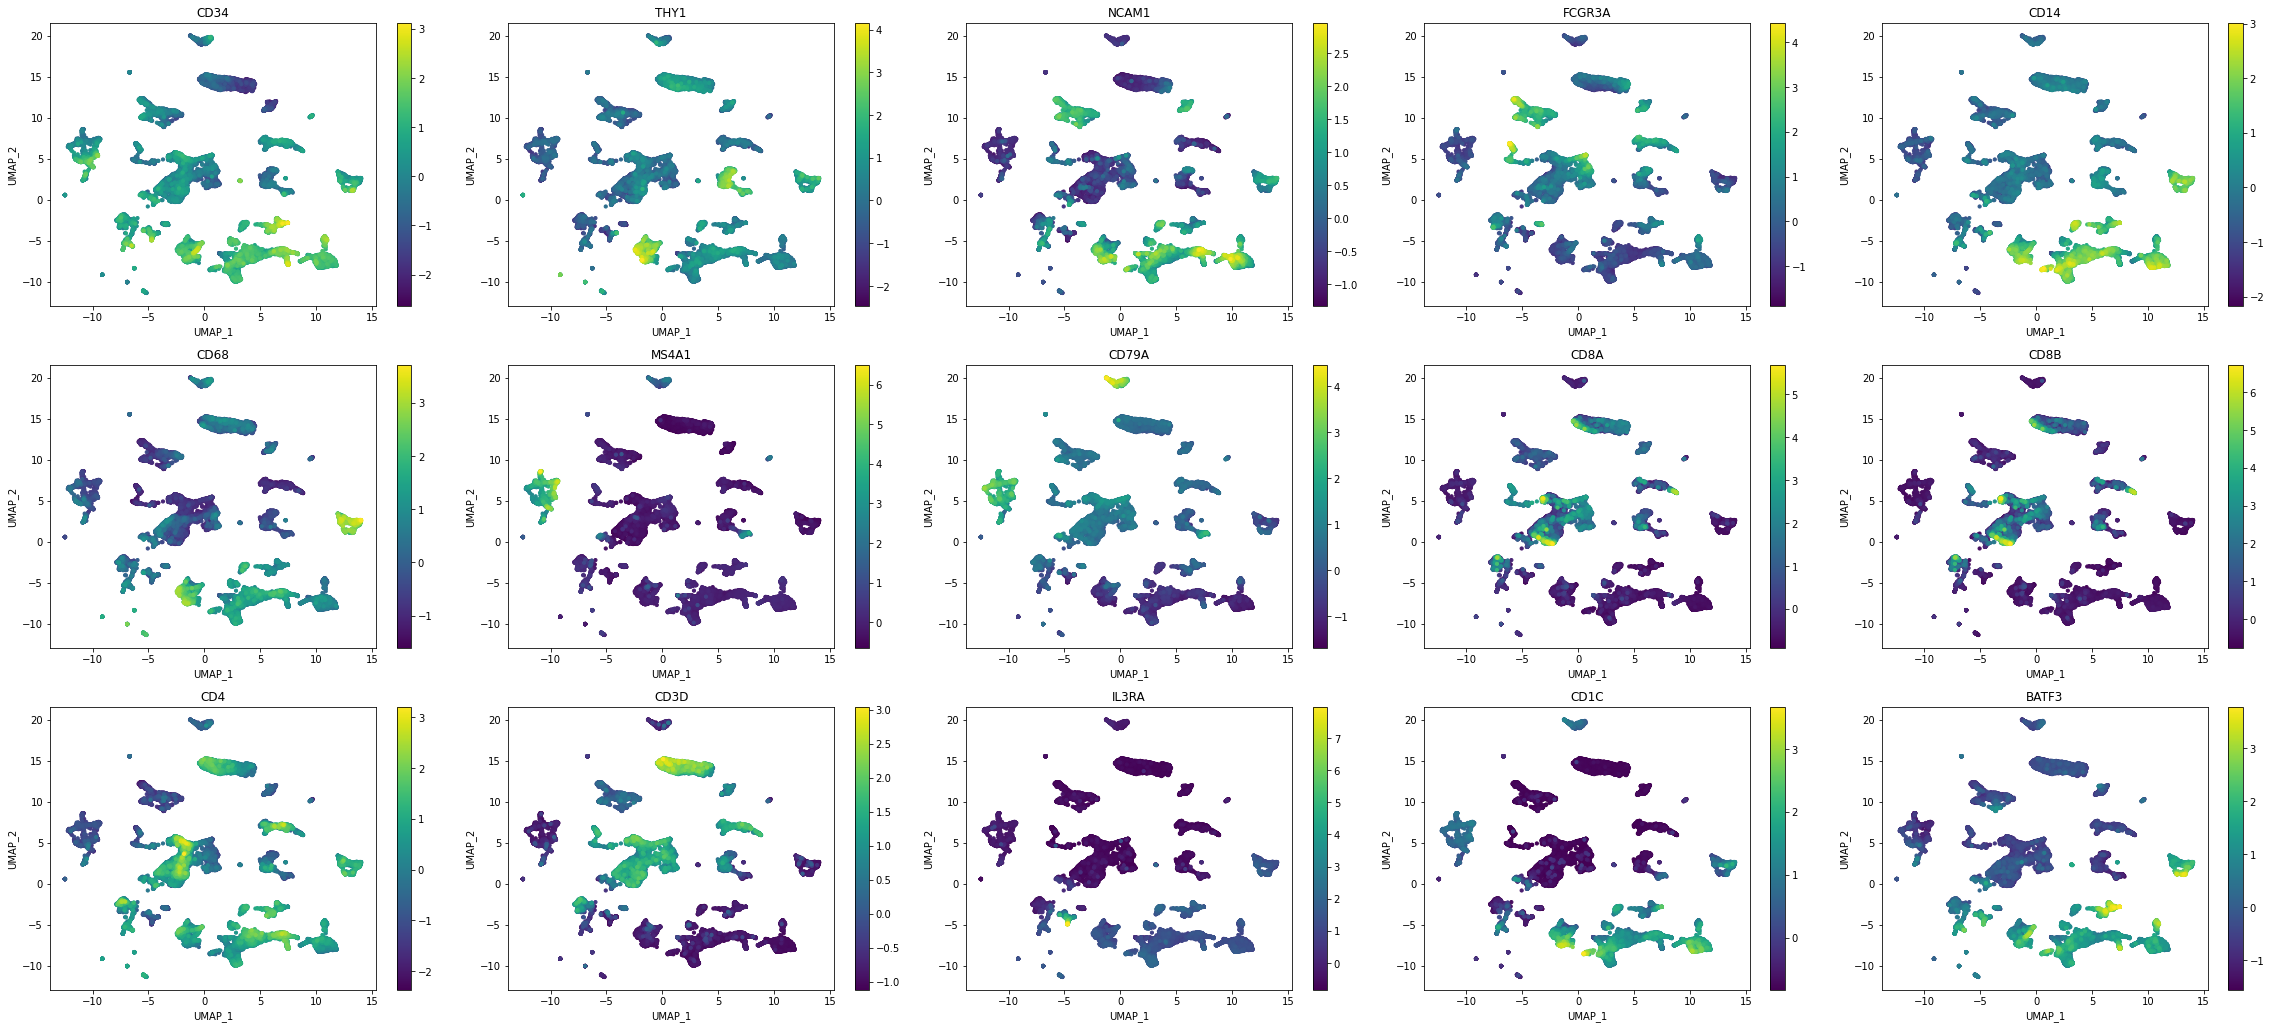

In [31]:
for key in cistopic_obj_dict.keys():
    print(key)
    plot_imputed_features(cistopic_obj_dict[key],
                    reduction_name='UMAP',
                    imputed_data=gene_act,
                    features=['CD34', 'THY1', # CD34+
                              'NCAM1', 'FCGR3A', # NK
                              'CD14', 'CD68', # Monocytes
                              'MS4A1', 'CD79A', # B cells
                              'CD8A', 'CD8B', # Cytotoxic CD8 cells
                              'CD4', # CD4 T
                              'CD3D', # T
                              'IL3RA', 'CD1C', 'BATF3', # Dendritic
                             ],
                    scale=True,
                    num_columns=5,
                    )

### Infer the Differentially Accessible Genes (DAGs)

In [29]:
from pycisTopic.clust_vis import plot_imputed_features

In [30]:
dag_markers_dict = {}
for key in cistopic_obj_dict.keys():
    print(key)
    dag_markers_dict[key] = find_diff_features(cistopic_obj_dict[key],
                      gene_act_dict[key],
                      variable='consensus_cell_type',
                      var_features=None,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=5,
                      )

libds_merged


2021-10-28 13:10:33,094	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


(pid=10113) 2021-10-28 13:10:43,482 cisTopic     INFO     Computing p-value for B cell
(pid=10109) 2021-10-28 13:10:44,765 cisTopic     INFO     Computing p-value for CD14+ monocyte
(pid=10112) 2021-10-28 13:10:46,270 cisTopic     INFO     Computing p-value for CD16+ monocyte
(pid=10111) 2021-10-28 13:10:47,668 cisTopic     INFO     Computing p-value for CD4+ T cell
(pid=10110) 2021-10-28 13:10:49,246 cisTopic     INFO     Computing p-value for Cytotoxic T cell
(pid=10112) 2021-10-28 13:13:00,708 cisTopic     INFO     Computing log2FC for CD16+ monocyte
(pid=10109) 2021-10-28 13:13:00,952 cisTopic     INFO     Computing log2FC for CD14+ monocyte
(pid=10113) 2021-10-28 13:13:06,154 cisTopic     INFO     Computing log2FC for B cell
(pid=10110) 2021-10-28 13:13:07,179 cisTopic     INFO     Computing log2FC for Cytotoxic T cell
(pid=10111) 2021-10-28 13:13:11,931 cisTopic     INFO     Computing log2FC for CD4+ T cell
(pid=10112) 2021-10-28 13:13:56,256 cisTopic     INFO     CD16+ monocyte 